___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Tree Types Prediction Project***". This is the second medium project of ***Machine Learning*** course.

In this project, you must perform EDA processes for implementing predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering using SQLite local database. 

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement KNN Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Implement SVM Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred',
              'weight': 'bold', 'size': 14}
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

#### *ii. Load Dataset*

In [2]:
df = pd.read_csv('covtype.csv')

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [6]:
df.shape

(581012, 55)

In [7]:
df['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [8]:
df['Cover_Type'].value_counts(normalize=True)

2    0.487599
1    0.364605
3    0.061537
7    0.035300
6    0.029891
5    0.016339
4    0.004728
Name: Cover_Type, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [11]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column Elevation has 1978 unique values
Column Aspect has 361 unique values
Column Slope has 67 unique values
Column Horizontal_Distance_To_Hydrology has 551 unique values
Column Vertical_Distance_To_Hydrology has 700 unique values
Column Horizontal_Distance_To_Roadways has 5785 unique values
Column Hillshade_9am has 207 unique values
Column Hillshade_Noon has 185 unique values
Column Hillshade_3pm has 255 unique values
Column Horizontal_Distance_To_Fire_Points has 5827 unique values
Column Wilderness_Area1 has 2 unique values
Column Wilderness_Area2 has 2 unique values
Column Wilderness_Area3 has 2 unique values
Column Wilderness_Area4 has 2 unique values
Column Soil_Type1 has 2 unique values
Column Soil_Type2 has 2 unique values
Column Soil_Type3 has 2 unique values
Column Soil_Type4 has 2 unique values
Column Soil_Type5 has 2 unique values
Column Soil_Type6 has 2 unique values
Column Soil_Type7 has 2 unique values
Column Soil_Type8 has 2 unique values
Column Soil_Type9 has 2 unique 

In [12]:
df.apply(lambda x: x.nunique())

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [13]:
# Check whether there's only one type of Soil for each row
df.drop(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4','Cover_Type'], axis=1).sum(axis=1).mean()

1.0

In [13]:
df.isnull().sum()*100/df.shape[0]

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Type10                       

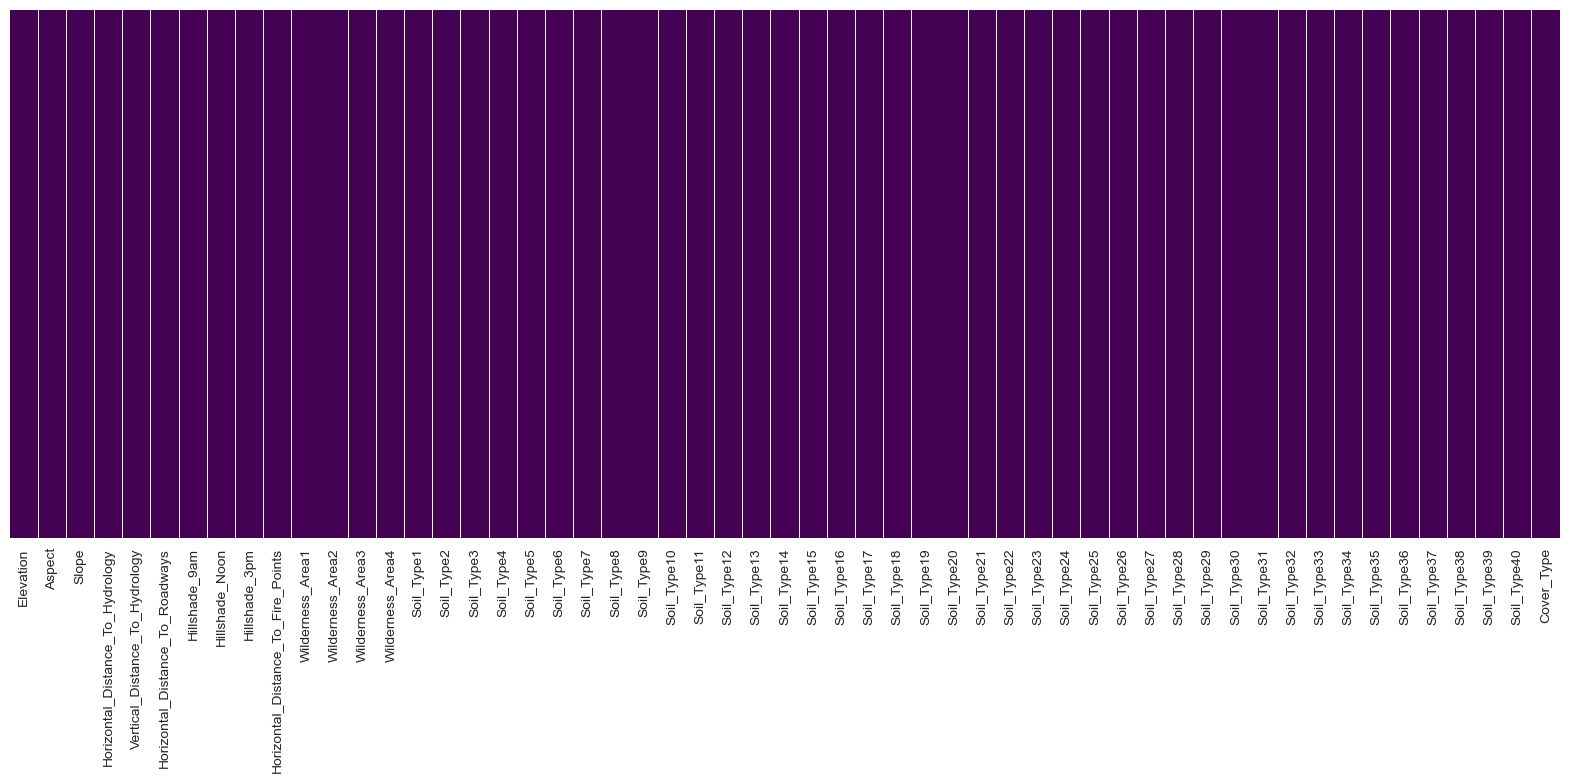

In [14]:
plt.figure(figsize=(20,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
numeric = []
for col in df.columns:
    if df[col].nunique() > 7 : numeric.append(col)
print(numeric)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


In [14]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [19]:
for i in df.columns:
    print(i)
    print('-'*len(i))
    print(df[i].value_counts().head(5), '\n')

Elevation
---------
2968    1681
2962    1674
2991    1671
2972    1662
2975    1656
Name: Elevation, dtype: int64 

Aspect
------
45     6308
0      4914
90     4677
135    3834
63     3680
Name: Aspect, dtype: int64 

Slope
-----
11    33824
10    33812
12    33217
13    32419
9     32049
Name: Slope, dtype: int64 

Horizontal_Distance_To_Hydrology
--------------------------------
30     34139
0      24603
150    20785
60     19189
67     15223
Name: Horizontal_Distance_To_Hydrology, dtype: int64 

Vertical_Distance_To_Hydrology
------------------------------
0     38665
3      9298
10     8863
7      8741
6      8590
Name: Vertical_Distance_To_Hydrology, dtype: int64 

Horizontal_Distance_To_Roadways
-------------------------------
150     1332
618     1065
900      918
390      914
1020     900
Name: Horizontal_Distance_To_Roadways, dtype: int64 

Hillshade_9am
-------------
226    11657
228    11374
230    11355
224    11210
223    10887
Name: Hillshade_9am, dtype: int64 

Hillsha

In [21]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915,-0.108936


In [254]:
df.corr()['Cover_Type'].sort_values()

Elevation                            -0.269554
Wilderness_Area1                     -0.203913
Horizontal_Distance_To_Roadways      -0.153450
Soil_Type22                          -0.141746
Soil_Type23                          -0.135055
Soil_Type29                          -0.124933
Horizontal_Distance_To_Fire_Points   -0.108936
Hillshade_Noon                       -0.096426
Soil_Type32                          -0.075562
Soil_Type24                          -0.068746
Soil_Type31                          -0.065347
Soil_Type33                          -0.062502
Hillshade_3pm                        -0.048290
Wilderness_Area2                     -0.048059
Soil_Type19                          -0.036452
Hillshade_9am                        -0.035415
Soil_Type20                          -0.028665
Soil_Type21                          -0.025400
Soil_Type12                          -0.023601
Horizontal_Distance_To_Hydrology     -0.020317
Soil_Type27                          -0.014407
Soil_Type30  

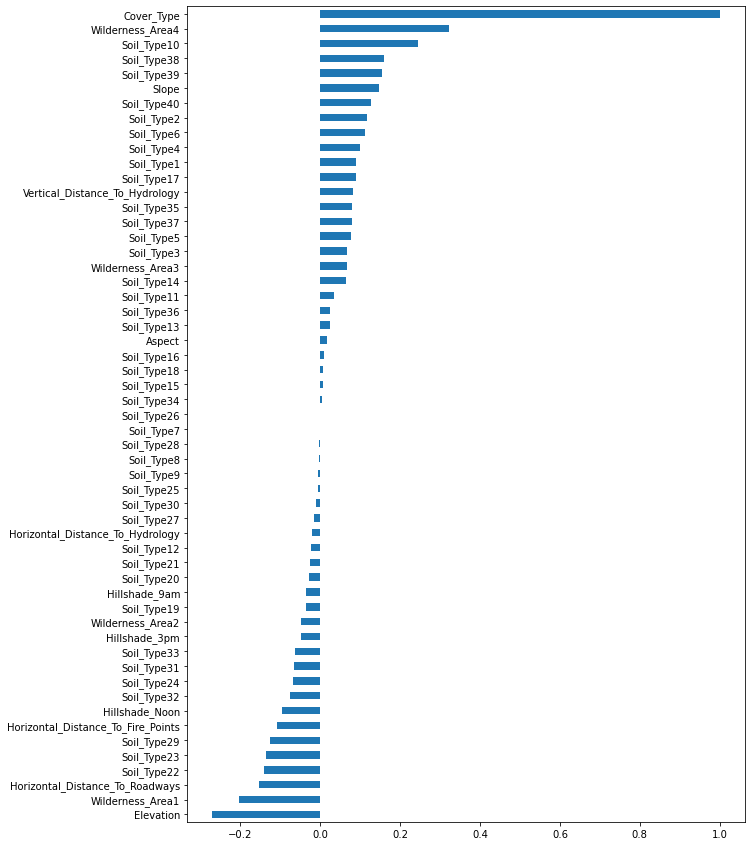

In [22]:
df.corr()['Cover_Type'].sort_values().plot.barh(figsize=(10,15))

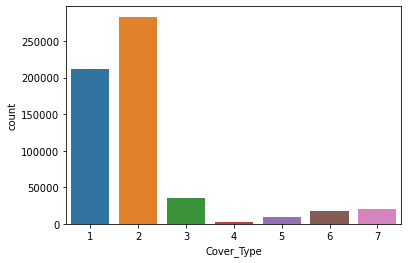

In [256]:
sns.countplot(df['Cover_Type'])

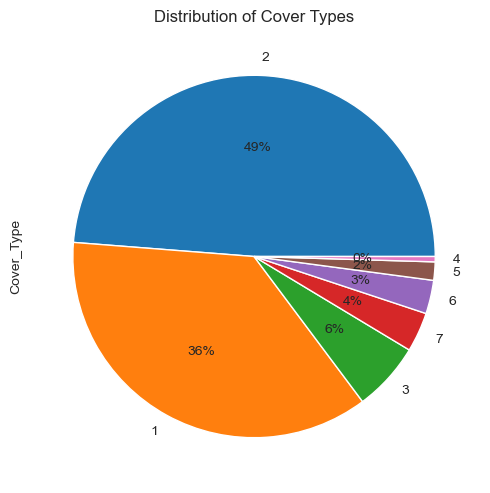

In [16]:
plt.figure(figsize=(6,6))
df['Cover_Type'].value_counts(normalize=True).plot.pie(autopct='%1.f%%')
plt.title('Distribution of Cover Types')
plt.show()

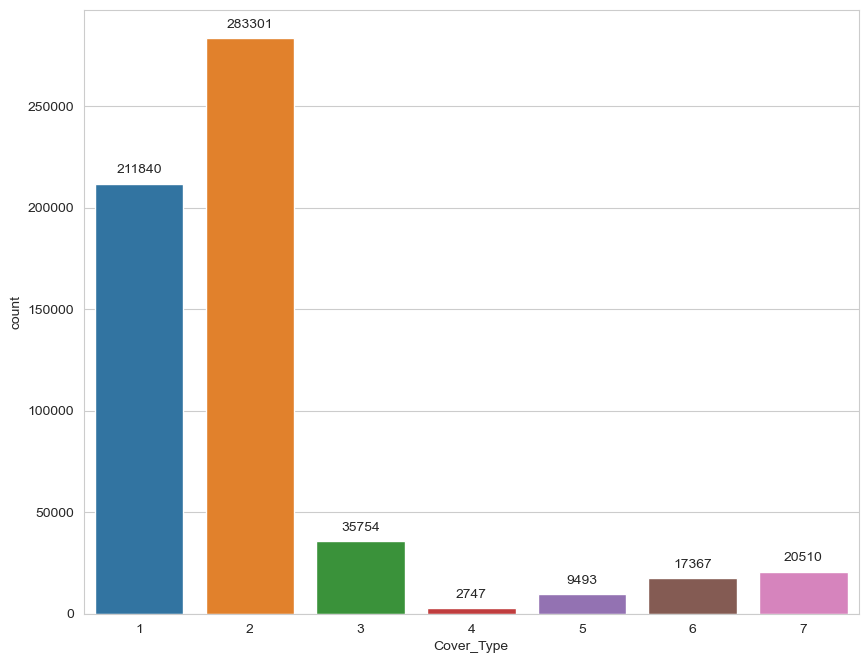

In [21]:
plt.figure(figsize=(10, 8))
vizz=sns.countplot('Cover_Type', data=df)
for p in vizz.patches:
    vizz.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

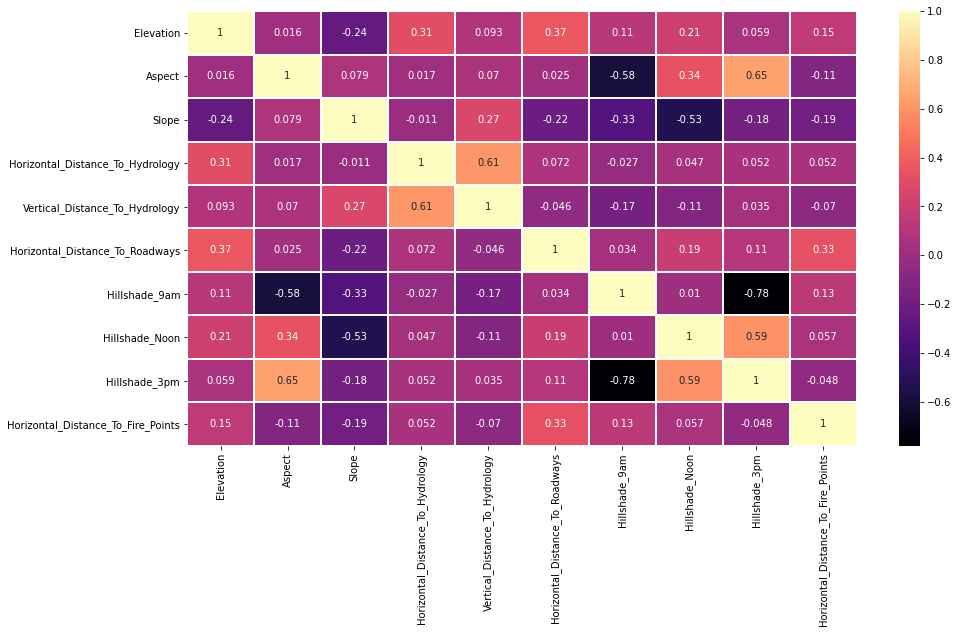

In [3]:
plt.figure(figsize=(15,8))
sns.heatmap(df.iloc[:,:10].corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

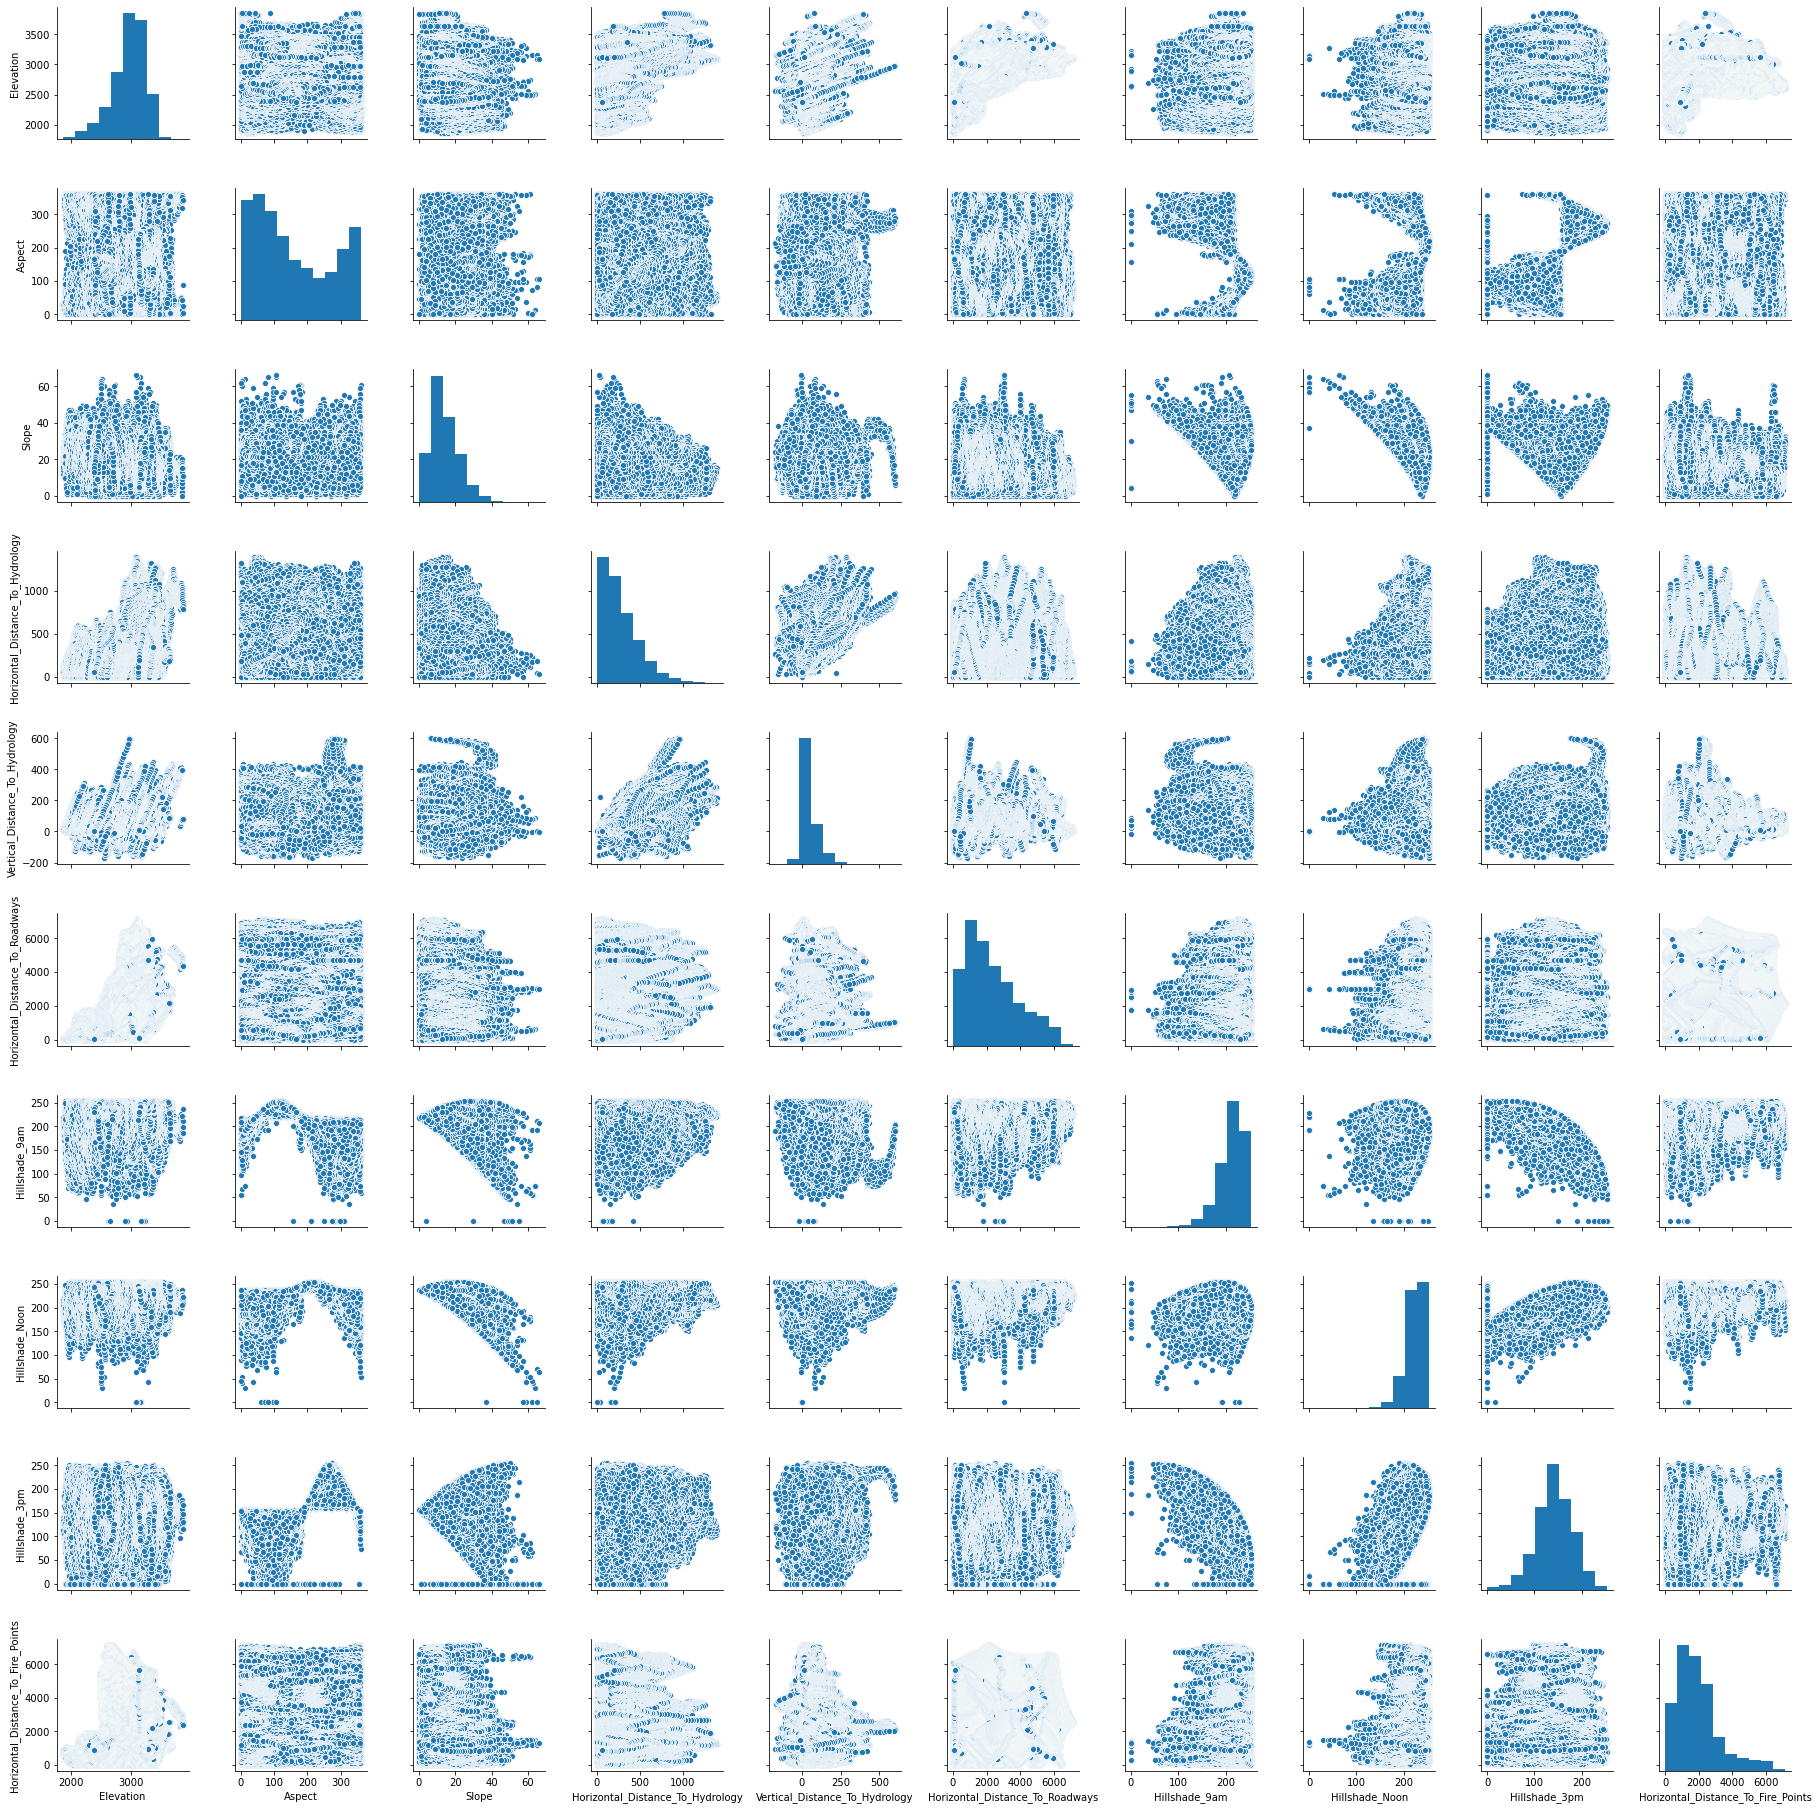

In [5]:
sns.pairplot(df.iloc[:,:10])

***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [23]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

In [24]:
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5


In [25]:
df.iloc[:2,:15]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0


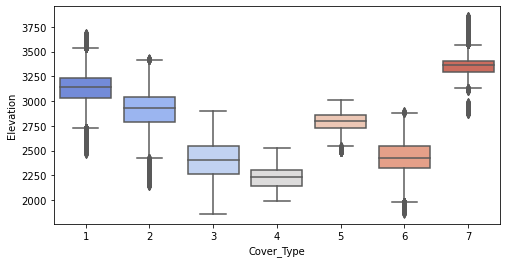

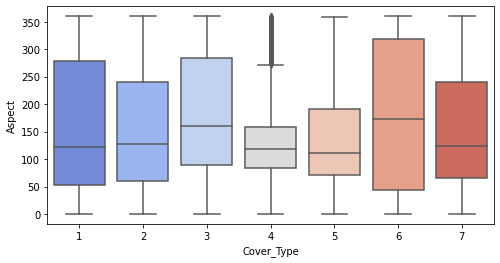

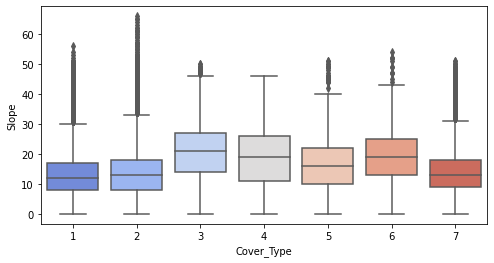

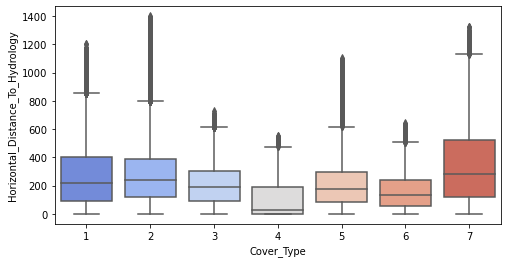

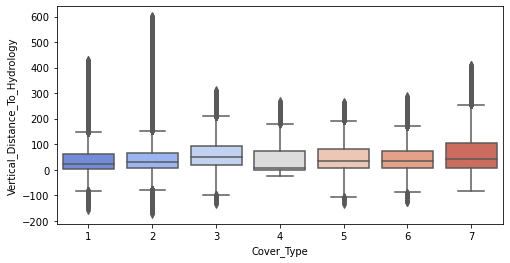

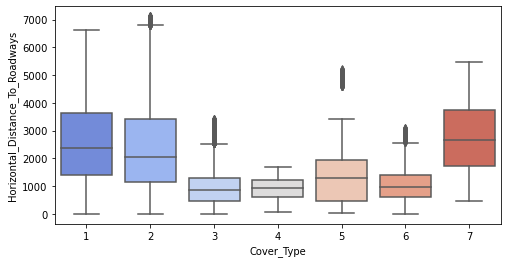

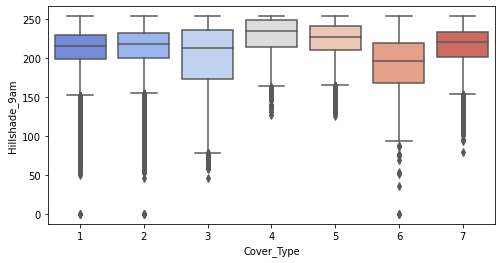

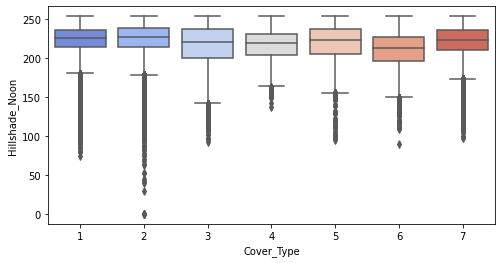

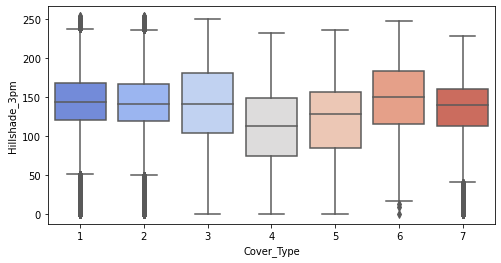

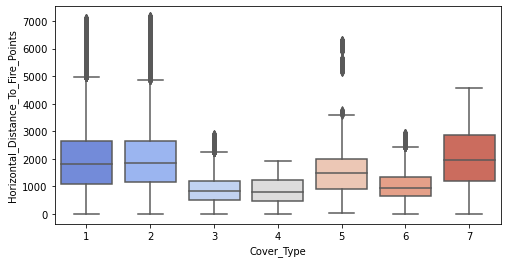

In [7]:
#df['Cover_Type']=df['Cover_Type'].astype('category') #To convert target class into category

for i, col in enumerate(df.columns[:10]):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=df['Cover_Type'], y=col, data=df, palette="coolwarm")

In [51]:
[print(df[i].value_counts()[1]) for i in df.columns[10:14]]

260796
29884
253364
36968


[None, None, None, None]

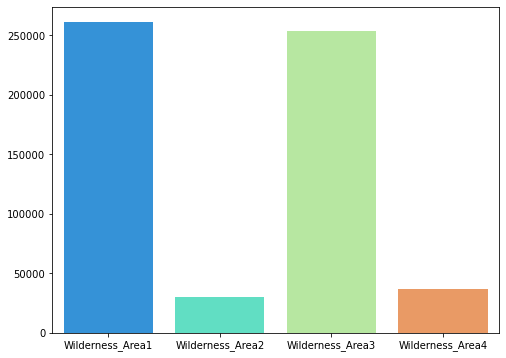

In [68]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=df.columns[10:14] ,y=[df[i].value_counts()[1] for i in df.columns[10:14]] , palette="rainbow")

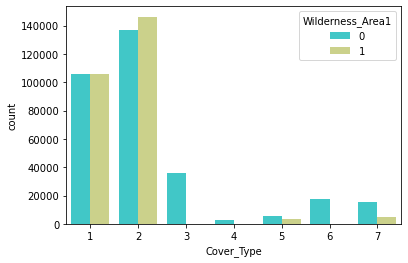

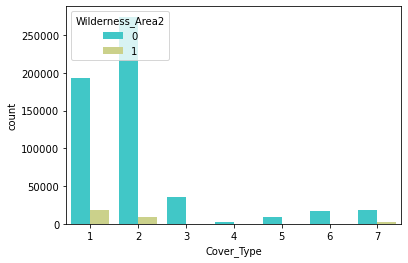

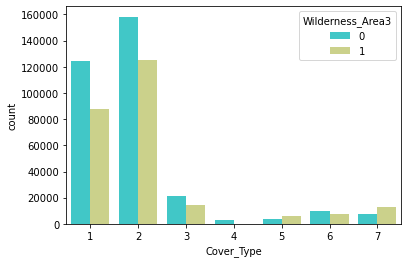

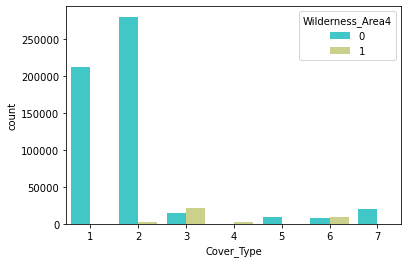

In [71]:
for i in df.columns[10:14]:
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=df['Cover_Type'], hue=df[i] ,data=df, palette="rainbow")

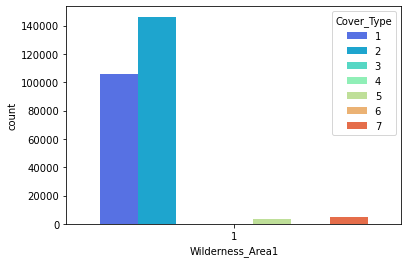

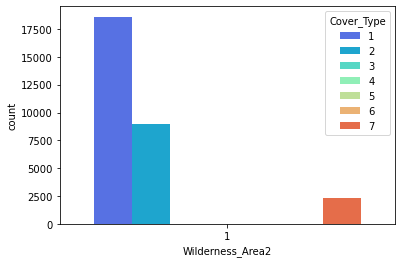

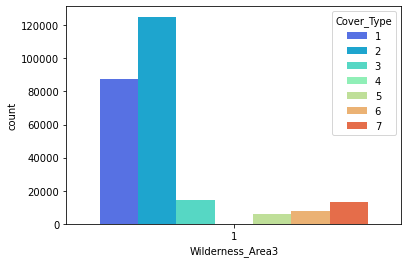

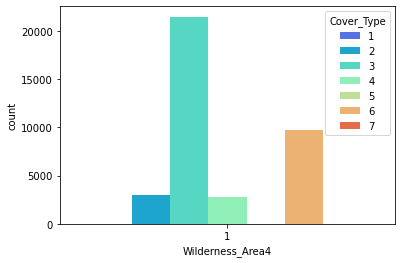

In [74]:
for i in df.columns[10:14]:
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=df[df[i]==1][i], hue=df['Cover_Type'] ,data=df, palette="rainbow")

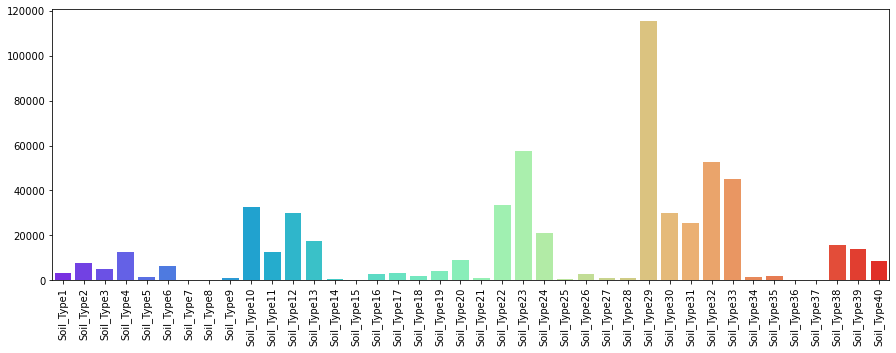

In [105]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x=df.columns[14:54] ,y=[df[i].value_counts()[1] for i in df.columns[14:54]] , palette="rainbow")
plt.xticks(rotation=90);

In [87]:
df[(df.Cover_Type==4) & (df.Wilderness_Area4==1)]['Wilderness_Area4'].size

2747

In [108]:
[print(df[i].value_counts()) for i in df.columns[14:54]]

0    577981
1      3031
Name: Soil_Type1, dtype: int64
0    573487
1      7525
Name: Soil_Type2, dtype: int64
0    576189
1      4823
Name: Soil_Type3, dtype: int64
0    568616
1     12396
Name: Soil_Type4, dtype: int64
0    579415
1      1597
Name: Soil_Type5, dtype: int64
0    574437
1      6575
Name: Soil_Type6, dtype: int64
0    580907
1       105
Name: Soil_Type7, dtype: int64
0    580833
1       179
Name: Soil_Type8, dtype: int64
0    579865
1      1147
Name: Soil_Type9, dtype: int64
0    548378
1     32634
Name: Soil_Type10, dtype: int64
0    568602
1     12410
Name: Soil_Type11, dtype: int64
0    551041
1     29971
Name: Soil_Type12, dtype: int64
0    563581
1     17431
Name: Soil_Type13, dtype: int64
0    580413
1       599
Name: Soil_Type14, dtype: int64
0    581009
1         3
Name: Soil_Type15, dtype: int64
0    578167
1      2845
Name: Soil_Type16, dtype: int64
0    577590
1      3422
Name: Soil_Type17, dtype: int64
0    579113
1      1899
Name: Soil_Type18, dtype: int64
0

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [107]:
df.skew()

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

In [81]:
df.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

In [8]:
df.iloc[:,[10,11,12,13,54]].head()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,1,0,0,0,5
1,1,0,0,0,5
2,1,0,0,0,2
3,1,0,0,0,2
4,1,0,0,0,5


In [103]:
Wildernessdf.iloc[:,-1:]

,Cover_Type
0,5
1,5
2,2
3,2
4,5
...,...
581007,3
581008,3
581009,3
581010,3


In [104]:
Wildernessdf=df.iloc[:,[10,11,12,13,54]]
plt.figure(figsize=(16,8))
sns.countplot(x=Wildernessdf.iloc[:,:-1], hue=Wildernessdf.iloc[:,-1:],palette="rainbow")
plt.xticks(rotation=90)

ValueError: could not broadcast input array from shape (581012,4) into shape (581012)

<Figure size 1152x576 with 0 Axes>

In [266]:
df[df['Vertical_Distance_To_Hydrology']>180].count()[0]/len(df)

0.03814034822000234

In [268]:
df[df['Horizontal_Distance_To_Roadways']>6600].count()[0]/len(df)

0.0015266466097085775

In [21]:
from scipy.stats import iqr

In [270]:
np.percentile(df['Horizontal_Distance_To_Roadways'], 75)+iqr(df['Horizontal_Distance_To_Roadways'])*1.5 #/ len(df)

6661.0

In [271]:
(np.percentile(df['Horizontal_Distance_To_Roadways'], 75)+iqr(df['Horizontal_Distance_To_Roadways'])*1.5 )/ len(df)

0.011464479219017852

In [272]:
np.percentile(df['Horizontal_Distance_To_Roadways'], 75)

3328.0

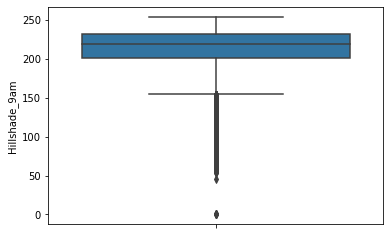

In [274]:
sns.boxplot(df[df['Cover_Type']==2]['Hillshade_9am'], orient='v')

In [112]:
df[(df['Hillshade_9am']<30)].groupby('Cover_Type')

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000023C53DC7070>>

In [276]:
df[df['Hillshade_9am']<150].count()[0]/len(df)

0.03144513366333226

In [277]:
df[(df['Hillshade_9am']<150) & (df['Cover_Type']==4)].count()[0]

15

In [ ]:
sns.boxplot(df['Hillshade_Noon'], orient='v')

In [ ]:
sns.boxplot(df['Hillshade_3pm'], orient='v')

In [ ]:
sns.boxplot(df['Horizontal_Distance_To_Fire_Points'], orient='v')

In [ ]:
df[df['Horizontal_Distance_To_Fire_Points']>5000].count()[0] #/len(df)

In [ ]:
df.groupby('Cover_Type')['Horizontal_Distance_To_Fire_Points'].mean()

In [ ]:
df['Horizontal_Distance_To_Fire_Points'].mean()

In [ ]:
df[df['Cover_Type']==3]['Horizontal_Distance_To_Fire_Points'].max()

In [ ]:
sns.boxplot(df[df['Cover_Type']==3]['Horizontal_Distance_To_Fire_Points'], orient='v')

In [ ]:
df[(df['Horizontal_Distance_To_Roadways']<(np.percentile(df['Horizontal_Distance_To_Roadways'], 25)-iqr(df['Horizontal_Distance_To_Roadways'])*1.5)) | (df['Horizontal_Distance_To_Roadways'] > (np.percentile(df['Horizontal_Distance_To_Roadways'], 75)+iqr(df['Horizontal_Distance_To_Roadways'])*1.5))].count()[0]

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection in *EDA Project (Outo Scout)* are given below.

In [ ]:
from scipy.stats import zscore

In [ ]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

In [ ]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [ ]:
for col in numeric:
    outlier_inspect(tree, col)

In [ ]:
outlier_zscore(df,'Slope', min_z=1, max_z=5, step=0.1, print_list=False)

In [117]:
for i in df.columns[:10]:
    print('\n', 'Number of Outliers for Column:',i)
    print('-'*(32+len(i)))
    for j in np.linspace(1.5, 3.0, num=7):
        print('Z-Score '+str(j), '\t', ':',df[(df[i]<(np.percentile(df[i], 25)-iqr(df[i])*j)) | (df[i] > (np.percentile(df[i], 75)+iqr(df[i])*j))].count()[0])


 Number of Outliers for Column: Elevation
-----------------------------------------
Z-Score 1.5 	 : 15569
Z-Score 1.75 	 : 9524
Z-Score 2.0 	 : 4729
Z-Score 2.25 	 : 1548
Z-Score 2.5 	 : 225
Z-Score 2.75 	 : 0
Z-Score 3.0 	 : 0

 Number of Outliers for Column: Aspect
--------------------------------------
Z-Score 1.5 	 : 0
Z-Score 1.75 	 : 0
Z-Score 2.0 	 : 0
Z-Score 2.25 	 : 0
Z-Score 2.5 	 : 0
Z-Score 2.75 	 : 0
Z-Score 3.0 	 : 0

 Number of Outliers for Column: Slope
-------------------------------------
Z-Score 1.5 	 : 15316
Z-Score 1.75 	 : 9437
Z-Score 2.0 	 : 4074
Z-Score 2.25 	 : 2158
Z-Score 2.5 	 : 1133
Z-Score 2.75 	 : 634
Z-Score 3.0 	 : 275

 Number of Outliers for Column: Horizontal_Distance_To_Hydrology
----------------------------------------------------------------
Z-Score 1.5 	 : 14557
Z-Score 1.75 	 : 9336
Z-Score 2.0 	 : 5831
Z-Score 2.25 	 : 3540
Z-Score 2.5 	 : 1948
Z-Score 2.75 	 : 929
Z-Score 3.0 	 : 414

 Number of Outliers for Column: Vertical_Distance_To_Hyd

In [ ]:
for i in df.columns[:10]:
    print('\n', 'Number of Outliers for Column:',i)
    print('-'*(32+len(i)))
    for j in np.linspace(1.5, 3.0, num=7):
        print('Z-Score '+str(j), '\t', ':',df[(df[i]<(np.percentile(df[i], 25)-iqr(df[i])*j)) | (df[i] > (np.percentile(df[i], 75)+iqr(df[i])*j))].count()[0])

In [ ]:
df[(df[i]<(np.percentile(df[i], 25)-iqr(df[i])*j)) | (df[i] > (np.percentile(df[i], 75)+iqr(df[i])*j))].count()[0]
sns.lineplot(data=may_flights, x=np.linspace(1.5,3,7), y="passengers")

In [22]:
elevation={}
for j in np.linspace(1.5, 3.0, num=7):
    elevation[j]= df[(df['Elevation']<(np.percentile(df['Elevation'], 25)-iqr(df['Elevation'])*j)) | (df['Elevation'] > (np.percentile(df['Elevation'], 75)+iqr(df['Elevation'])*j))].count()[0]

In [23]:
elevation

{1.5: 15569, 1.75: 9524, 2.0: 4729, 2.25: 1548, 2.5: 225, 2.75: 0, 3.0: 0}

In [31]:
list(elevation.keys())

[1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]

In [34]:
elevation.values()

dict_values([15569, 9524, 4729, 1548, 225, 0, 0])

In [36]:
elevation2 = elevation

In [41]:
elevation2[1.5] = 10000

In [61]:
dfz= pd.DataFrame.from_dict(elevation2, orient='index') #, index=elevation2.keys(), columns='elavation2')
dfz#.join(pd.DataFrame.from_dict(elevation, orient='index'))

,0
1.50,10000
1.75,9524
2.00,4729
2.25,1548
2.50,225
2.75,0
3.00,0


In [60]:
pd.DataFrame.from_dict(elevation, orient='index')

,0
1.50,10000
1.75,9524
2.00,4729
2.25,1548
2.50,225
2.75,0
3.00,0


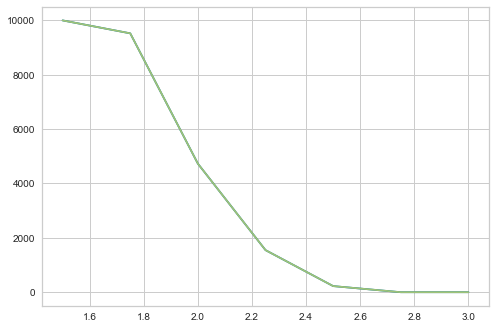

In [43]:
sns.lineplot(x=list(elevation.keys()), y=list(elevation.values()))
sns.lineplot(x=list(elevation2.keys()), y=list(elevation2.values()))

#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

***
***

## 3. Feature Engineering with *sqlite3* Library

Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

In [ ]:
import sqlite3

In [ ]:
conn = sqlite3.connect('covtype2.db')

In [ ]:
df.to_sql('tree1', con=conn)

In [ ]:
cur = conn.cursor()

In [ ]:
for row in cur.execute('SELECT * FROM tree1 LIMIT 5'):
        print(row)

In [ ]:
cur.execute('ALTER TABLE tree1 ADD Distance_To_Hydrology AS ((Horizontal_Distance_To_Hydrology)+(Vertical_Distance_To_Hydrology))')

In [ ]:
cur.execute('ALTER TABLE tree1 ADD Distance_To_Hydrology AS Math.SQRT((Horizontal_Distance_To_Hydrology**2)+(Vertical_Distance_To_Hydrology**2))')

In [ ]:
ALTER TABLE dbo.Products ADD RetailValue AS (QtyAvailable * UnitPrice * 1.5)

In [ ]:
for row in cur.execute('SELECT (Horizontal_Distance_To_Hydrology)**2  FROM tree1 LIMIT 5'):
        print(row)

In [ ]:
for row in cur.execute('SELECT php('sqrt', Distance_To_Hydrology) FROM tree1 LIMIT 5'):
        print(row)

In [ ]:
df.head(2)

In [ ]:
cur.execute('SELECT * FROM tree1 LIMIT 5')
cur.fetchall()

In [ ]:
# Be sure to close the connection
con.close()

## Feature Engineering with Python, New Column

In [ ]:
df2=df

In [ ]:
df2['Distance_To_Hydrology']=round((df2['Horizontal_Distance_To_Hydrology']**2 + df2['Vertical_Distance_To_Hydrology']**2)**0.5, 0)

In [ ]:
df2 = df2.drop(['Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology'], axis=1)

In [ ]:
df2.head()

In [ ]:
X_f=df.drop(["Cover_Type"], axis=1)
y_f=df["Cover_Type"]
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f,y_f,test_size=0.20, stratify=y_f, random_state=42)

***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

NameError: name 'train_test_split' is not defined

### Implement KNeighborsClassifer

The first and most important step for the [KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/) algorithm is to determine the optimal k (number of neighbors). 

Build different models with k values in the range you specify. You can observe the change of train and test accuracy values according to different k values using a plot. The point at which train accuracy and test accuracy values begin to run parallel is the optimal k value. Then set up your final KNN model with the optimal k value you determined and calculate accuracy.

- Import the modul
- Fit the model 
- Predict the test set
- Visualize the result
- Evaluate the performance

In [5]:
from sklearn.metrics import plot_confusion_matrix

[[40991  1255     0     0    21     1   100]
 [ 1142 55280    66     0   111    46    16]
 [    2   107  6907    27     7   101     0]
 [    0     0    75   431     0    43     0]
 [   23   162    15     0  1694     5     0]
 [    4    86   142    14     5  3222     0]
 [  119    28     0     0     0     0  3955]]
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     42368
           2       0.97      0.98      0.97     56661
           3       0.96      0.97      0.96      7151
           4       0.91      0.79      0.84       549
           5       0.92      0.89      0.91      1899
           6       0.94      0.93      0.94      3473
           7       0.97      0.96      0.97      4102

    accuracy                           0.97    116203
   macro avg       0.95      0.93      0.94    116203
weighted avg       0.97      0.97      0.97    116203



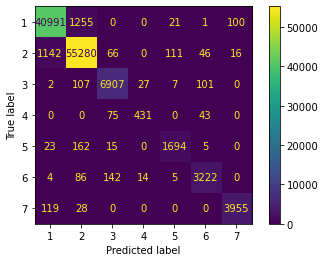

In [5]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(knn_model,X_test,y_test);

## Yellowbrick Visualizations

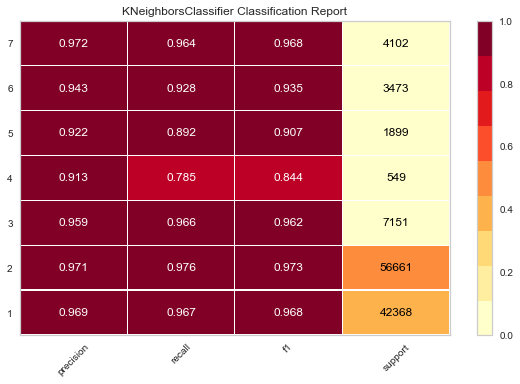

In [8]:
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
model = KNeighborsClassifier()
visualizer = ClassificationReport(model, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

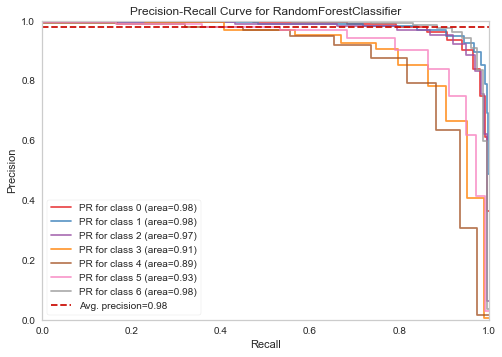

In [10]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    KNeighborsClassifier(n_estimators=10),
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

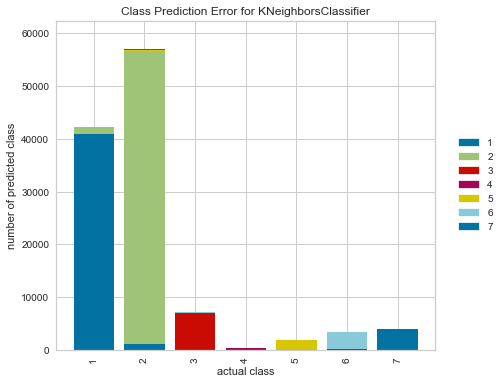

In [11]:
from yellowbrick.classifier import ClassPredictionError
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    KNeighborsClassifier())

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

## Scaling the dataset

In [6]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

**KNN With Scaling Data**

In [ ]:
knn_model_s = KNeighborsClassifier().fit(X_train_s, y_train)
y_pred = knn_model_s.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(knn_model_s,X_test_s,y_test);

## Searching for Best K value

In [ ]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.93      0.93      0.93      7151
           4       0.84      0.85      0.85       549
           5       0.84      0.84      0.84      1899
           6       0.89      0.87      0.88      3473
           7       0.94      0.94      0.94      4102

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



Text(0.5, 15.0, 'Predicted Label')

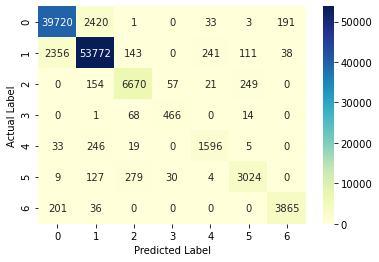

In [124]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.91      0.86      0.89       549
           5       0.95      0.78      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.95      0.95      0.95    116203



Text(0.5, 15.0, 'Predicted Label')

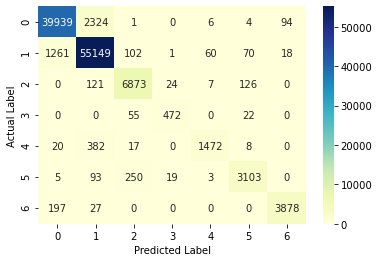

In [125]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [128]:
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           1       0.85      0.83      0.84     42368
           2       0.86      0.89      0.88     56661
           3       0.89      0.91      0.90      7151
           4       0.89      0.87      0.88       549
           5       0.89      0.61      0.72      1899
           6       0.85      0.80      0.82      3473
           7       0.94      0.91      0.93      4102

    accuracy                           0.86    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.86      0.86      0.86    116203



Text(0.5, 15.0, 'Predicted Label')

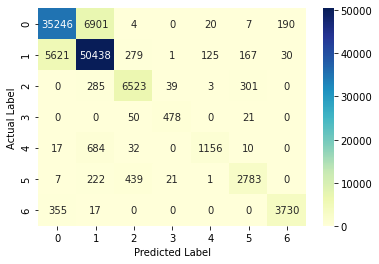

In [129]:
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

In [6]:
from sklearn.svm import SVC

In [ ]:
SVC_model = SVC(gamma='auto').fit(X_train, y_train)

In [ ]:
SVC_model = SVC().fit(X_train, y_train)
y_pred = SVC_model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

### Compare The Models

So far, you have created a multi-classifier model with 5 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

In [ ]:
MLA = []
Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
     GradientBoostingClassifier()]
X = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    MLA.append(accuracy_score(pred , y_test))

In [ ]:
d = { "Algorithm" : X, "Accuracy" : MLA }

dfm = pd.DataFrame(d)
dfm

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___